In [1]:
# filtering out the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# LOad the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset

SMS_SH_df = pd.read_csv("SMSSpamCollection.csv", sep='\t', header=None)
SMS_SH_df.columns=['label', 'body_text']
SMS_SH_df.head(5)

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


2.2 Exploring the data

In [5]:
# DataFrame.shape ==> Return a gtuple representing the dimensionality of the DataFrame
SMS_SH_df.shape

(5568, 2)

In [6]:
# dataFrame.info() function is used to get a concise summary of the dataframe
SMS_SH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [7]:
SMS_SH_df.describe()

,label,body_text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [8]:
# how many rows are spam or ham
SMS_SH_df.label.value_counts()

label
ham     4822
spam     746
Name: count, dtype: int64

In [9]:
SMS_SH_df.label.value_counts(normalize=True)

label
ham     0.86602
spam    0.13398
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

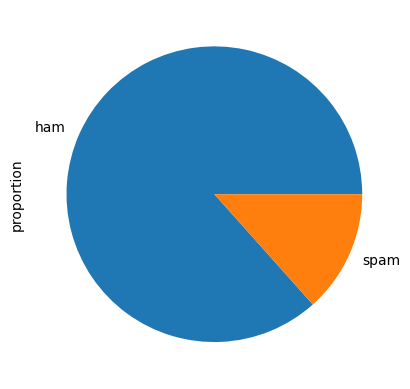

In [10]:
SMS_SH_df.label.value_counts(normalize=True).plot.pie()

In [11]:
# how many NULLs / missing values
SMS_SH_df.isnull().value_counts()

label  body_text
False  False        5568
Name: count, dtype: int64

In [12]:
df = SMS_SH_df.copy()

3. DATA Preparation-Pre-processing text data

In [13]:
a = 'I love nlp!!'


In [14]:
b= 'love NLP'

In [15]:
a==b

False

In [16]:
len(a)

12

3.1 remove punctuation

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# define punctuation
punct = string.punctuation
text = 'Hello!!!, I Love NLP, will use python in our code'
no_punct = ''
for char in text:
    if char not in punct:
        no_punct= no_punct+char
print(no_punct)

Hello I Love NLP will use python in our code


In [21]:
pd.set_option('display.max_colwidth',100)

In [34]:
# list comprhansion
# lambda function
# adding join to join chars into words
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct
df['body_text_nopunc'] = df['body_text'].apply(lambda x:remove_punct(x.lower()))
df.head(5)

,label,body_text,body_text_nopunc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive been searching for the right words to thank you for this breather i promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


3.3 Tokenization

In [37]:
from nltk.tokenize import word_tokenize

In [29]:
import re
# \w+ regex, indicates that is will split wherever it sees one or more non-word characters.
text = 'I love NLP, willl use python in our code.'
tokens = re.split('\W+', text)
tokens

['I', 'love', 'NLP', 'willl', 'use', 'python', 'in', 'our', 'code', '']

In [39]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))
df.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Ziedb/nltk_data'
    - 'C:\\Users\\Ziedb\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\Ziedb\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\Ziedb\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Ziedb\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
